In [21]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [22]:
''' this is ground truth of object 1 #0
0:
- cam_R_m2c: [0.09630630, 0.99404401, 0.05100790, 0.57332098, -0.01350810, -0.81922001, -0.81365103, 0.10814000, -0.57120699]
  cam_t_m2c: [-105.35775150, -117.52119142, 1014.87701320]
  obj_bb: [244, 150, 44, 58]
  obj_id: 1
'''

' this is ground truth of object 1 #0\n0:\n- cam_R_m2c: [0.09630630, 0.99404401, 0.05100790, 0.57332098, -0.01350810, -0.81922001, -0.81365103, 0.10814000, -0.57120699]\n  cam_t_m2c: [-105.35775150, -117.52119142, 1014.87701320]\n  obj_bb: [244, 150, 44, 58]\n  obj_id: 1\n'

(480, 640, 3)


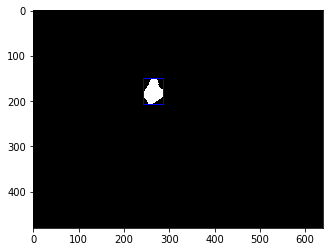

In [27]:
''' drawing bounding box '''
img = cv2.imread('0000_mask.png')
bx = 244
by = 150
bh = 44
bw = 58
cv2.line(img, (bx, by), (bx, by+bw), (0, 0, 255), 2)       # left 
cv2.line(img, (bx+bh, by), (bx+bh, by+bw), (0, 0, 255), 2) # right 
cv2.line(img, (bx, by), (bx+bh, by), (0, 0, 255), 2)       # top 
cv2.line(img, (bx+bh, by+bw), (bx, by+bw), (0, 0, 255), 2) # bottom
#plt.scatter([244], [150])
print(img.shape)
plt.imshow(img)

(480, 640, 3)


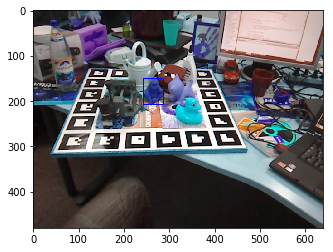

In [28]:
''' drawing bounding box '''
img = cv2.imread('0000_rgb.png')
bx = 244
by = 150
bh = 44
bw = 58
cv2.line(img, (bx, by), (bx, by+bw), (0, 0, 255), 2)       # left vertical
cv2.line(img, (bx+bh, by), (bx+bh, by+bw), (0, 0, 255), 2) # right vertical
cv2.line(img, (bx, by), (bx+bh, by), (0, 0, 255), 2)       #
cv2.line(img, (bx+bh, by+bw), (bx, by+bw), (0, 0, 255), 2)
#plt.scatter([244], [150])
print(img.shape)
plt.imshow(img)

In [31]:
cam_R_m2c = [0.09630630, 0.99404401, 0.05100790, 0.57332098, -0.01350810, -0.81922001, -0.81365103, 0.10814000, -0.57120699]
cam_t_m2c = [-105.35775150, -117.52119142, 1014.87701320]
cam_R_m2c = np.array(cam_R_m2c).reshape((3, 3))
extrinsic = np.zeros((3,4))
extrinsic[:, :-1] = cam_R_m2c
extrinsic[:, -1] = np.array(cam_t_m2c).transpose()
print(extrinsic)

[[ 9.63063000e-02  9.94044010e-01  5.10079000e-02 -1.05357752e+02]
 [ 5.73320980e-01 -1.35081000e-02 -8.19220010e-01 -1.17521191e+02]
 [-8.13651030e-01  1.08140000e-01 -5.71206990e-01  1.01487701e+03]]


In [33]:
cam_K = [572.4114, 0.0, 325.2611, 0.0, 573.57043, 242.04899, 0.0, 0.0, 1.0]
cam_K = np.array(cam_K).reshape(3, 3)
print(cam_K)

[[572.4114    0.      325.2611 ]
 [  0.      573.57043 242.04899]
 [  0.        0.        1.     ]]


In [36]:
coords = np.array([[-11.7962, -26.1784, 4.3992, 1], 
[-24.9904, -19.5555, -40.8809, 1],
[-30.7946, -8.9462, -2.2305, 1], 
[-23.3204, 2.5032, -45.0967, 1], 
[-18.8764, 2.3459, -45.2322, 1], 
[8.4574,   27.8055, -1.2275, 1], 
[7.7106,   27.0222, 0.407, 1]])
print(coords.transpose())

[[-11.7962 -24.9904 -30.7946 -23.3204 -18.8764   8.4574   7.7106]
 [-26.1784 -19.5555  -8.9462   2.5032   2.3459  27.8055  27.0222]
 [  4.3992 -40.8809  -2.2305 -45.0967 -45.2322  -1.2275   0.407 ]
 [  1.       1.       1.       1.       1.       1.       1.    ]]


In [43]:
pixel_pos = np.matmul(cam_K, np.matmul(extrinsic, coords.transpose()))
print(pos.transpose())

[[255758.35624375 173529.66812357   1019.13121751]
 [269614.81834071 199448.10133924   1056.44720197]
 [271188.39278539 175373.176874     1040.23970633]
 [283252.41888204 202638.65004933   1059.88192699]
 [282247.4838152  203304.30273357   1056.32644994]
 [285011.6534108  180617.65116687   1011.70368433]
 [284438.9208967  179510.71113124   1011.29297503]]


In [47]:
img = cv2.imread('0000_rgb.png')
print(img.shape)
#plt.scatter([row[0]], [row[1]], s = 3)

(480, 640, 3)


[250.95723872 170.2721545    1.        ]
[255.20898521 188.79135746   1.        ]
[260.69798253 168.58919709   1.        ]
[267.24903187 191.18983435   1.        ]
[267.19721335 192.46351613   1.        ]
[281.71455519 178.52821331   1.        ]
[281.26262905 177.50613874   1.        ]


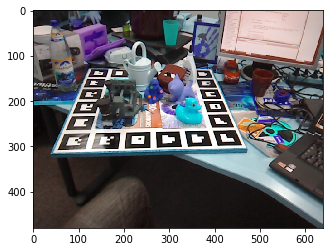

In [48]:
plt.imshow(img)
for row in pixel_pos.transpose():
    row[0] /= row[2]
    row[1] /= row[2]
    row[2] /= row[2]
    print(row)
    plt.scatter([row[0]], [row[1]], s = 3)
plt.show()